## Reading Data

In [1]:
import torchvision.datasets as dsets

In [2]:
import torchvision.transforms as transforms

ToTensor의 역할: $(H, W, C) \to (C, H, W) $

일반 image의 (height, width, channel) 를 PyTorch 로 쓰기 알맞게 변형시켜 줌

In [3]:
mnist_train = dsets.MNIST(root="data/MNIST/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="data/MNIST/", train=False, transform=transforms.ToTensor(), download=True)

Extracting data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/MNIST/raw


Extracting data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/MNIST/raw


Extracting data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/MNIST/raw




Extracting data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/MNIST/raw
Processing...
Done!


## Train

In [21]:
import torch
device = 'cuda' # 'cpu' or 'cuda'?

In [8]:
training_epochs = 15
batch_size = 100
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, 
                                          batch_size=batch_size, 
                                          shuffle=True, 
                                          drop_last=True)

In [24]:
linear = torch.nn.Linear(28 * 28, 10, bias=True).to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch
        
    print("Epoch: {:04d}/{} cost = {:.6f}".format(epoch + 1, training_epochs, avg_cost))

Epoch: 0001/15 cost = 0.534929
Epoch: 0002/15 cost = 0.359160
Epoch: 0003/15 cost = 0.331430
Epoch: 0004/15 cost = 0.316587
Epoch: 0005/15 cost = 0.307068
Epoch: 0006/15 cost = 0.300115
Epoch: 0007/15 cost = 0.294868
Epoch: 0008/15 cost = 0.290772
Epoch: 0009/15 cost = 0.287485
Epoch: 0010/15 cost = 0.284445
Epoch: 0011/15 cost = 0.281796
Epoch: 0012/15 cost = 0.279578
Epoch: 0013/15 cost = 0.277725
Epoch: 0014/15 cost = 0.275907


## Test

In [13]:
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device) # data <-- test_data
    Y_test = mnist_test.targets.to(device) # targets <-- test_labels
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  0.8883000016212463


## Visualization

In [14]:
import matplotlib.pyplot as plt
import random

In [15]:
r = random.randint(0, len(mnist_test)-1)
X_single = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single = mnist_test.targets[r:r + 1].to(device)

In [18]:
print("Label: ", Y_single.item())
single_prediction = linear(X_single)
print("Prediction: ", torch.argmax(single_prediction, 1).item())

Label:  4
Prediction:  4


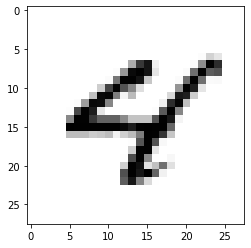

In [20]:
plt.imshow(X_single.view(28, 28), cmap="Greys", interpolation="nearest")
plt.show()